In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [2]:
from sklearn import preprocessing
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [5]:
df.shape

(4857377, 8)

In [6]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [7]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [8]:
new_df.tail()

,Close
Date,
2021-03-27,55193.357260
2021-03-28,55832.958824
2021-03-29,56913.993819
2021-03-30,58346.912268
2021-03-31,58764.349363


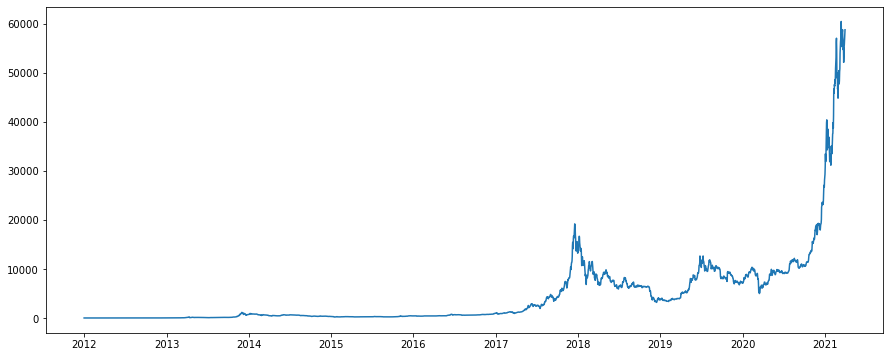

In [9]:
plt.plot(new_df)

In [10]:

df.isnull().values.any()

True

In [11]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
Date                       0
dtype: int64

In [12]:
df['Open'].mean()

6009.023680137011

In [13]:
df['Open'].fillna(value=df['Open'].mean(),inplace=True)
df['High'].fillna(value=df['High'].mean(),inplace=True)
df['Low'].fillna(value=df['Low'].mean(),inplace=True)
df['Close'].fillna(value=df['Close'].mean(),inplace=True)
df['Volume_(BTC)'].fillna(value=df['Volume_(BTC)'].mean(),inplace=True)
df['Volume_(Currency)'].fillna(value=df['Volume_(Currency)'].mean(),inplace=True)
df['Weighted_Price'].fillna(value=df['Weighted_Price'].mean(),inplace=True)


In [14]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
Date                 0
dtype: int64

In [15]:
df=new_df
forecast_out = int(20)
df['Prediction'] = df[['Close']].shift(-forecast_out)

In [16]:
X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
forest_reg.score(X_test, y_test)

0.9564975772575192

In [54]:
predict1 = forest_reg.predict(X_test)

In [55]:
accuracy = forest_reg.score(X_test, y_test)
print("accuracy: ", accuracy)

accuracy:  0.9564975772575192


In [56]:
forecast_prediction = forest_reg.predict(X_forecast)
print(forecast_prediction)

[58472.43780957 58472.43780957 58472.43780957 58472.43780957
 59275.96401532 57541.78567805 58472.43780957 58472.43780957
 58472.43780957 58472.43780957 58472.43780957 59159.55419519
 59159.55419519 55491.59765821 56764.35694514 59275.96401532
 57591.38297596 58472.43780957 58472.43780957 58472.43780957]


In [57]:
import matplotlib.pyplot as plt

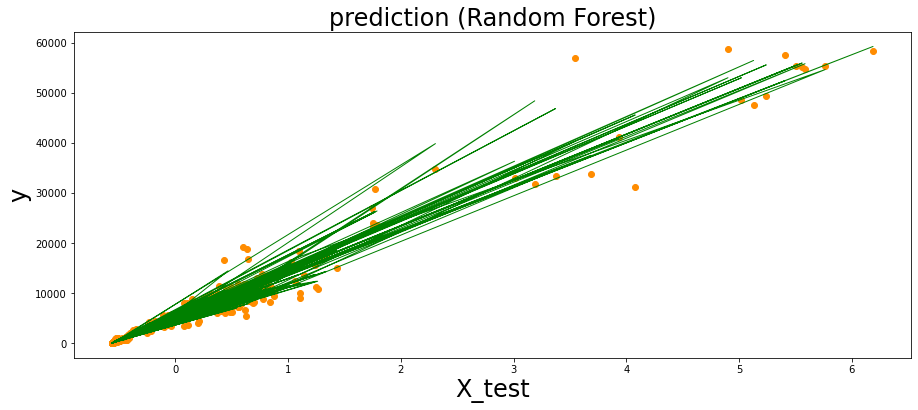

In [58]:
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, predict1, color='green', linewidth=1,label='predicted')
plt.title("prediction (Random Forest)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, predict1))
print(rms)

1780.0206599900102


In [60]:
last_date = new_df.iloc[-1].name
print(last_date)

2021-03-31


In [61]:
from datetime import datetime, timedelta

date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')

In [62]:
df1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df1 =df1.set_index('Date')

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-31 to 2021-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


Text(0, 0.5, '$(Dollar)')

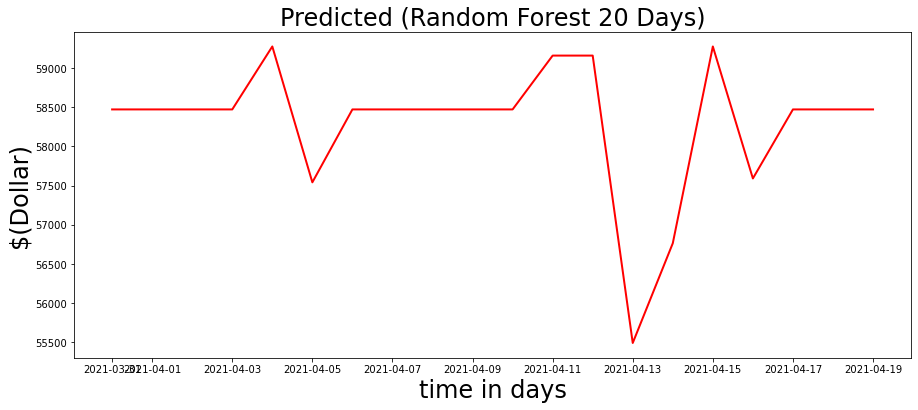

In [64]:
plt.plot(df1,color='red', lw=2)
plt.title("Predicted (Random Forest 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

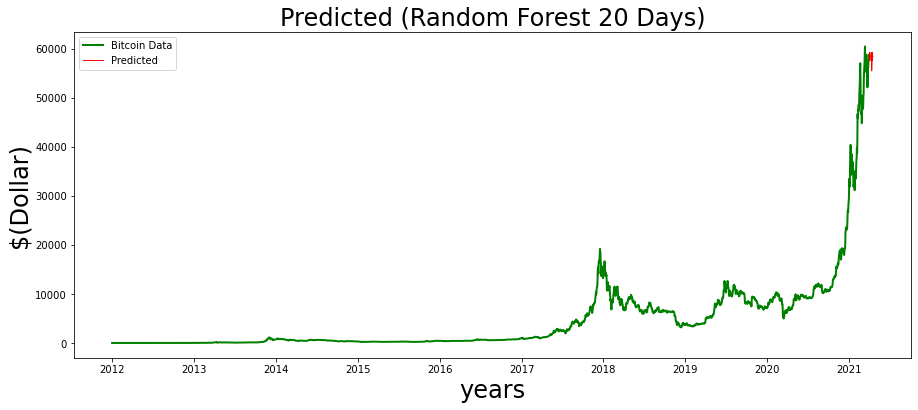

In [65]:
plt.plot(df['Close'],label='Bitcoin Data',color='green', lw=2)
plt.plot(df1['Close'],label='Predicted',color='red', lw=1)
plt.title("Predicted (Random Forest 20 Days)",fontsize=24)
plt.xlabel('years',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend(loc='best')

In [66]:
print("accuracy: ", accuracy)

accuracy:  0.9564975772575192
